# <font color='blue'>BoomBikes Sharing - Linear Regression Model</font>

# <font color='blue'>Index</font>
- <font color='blue'>1. Data understanding, preparation and EDA</font>
	- <font color='blue'>1.1 Imports</font>
	- <font color='blue'>1.2 Data Loading and understanding</font>
	- <font color='blue'>1.3 Data preparation</font>
		- <font color='blue'>1.3.1: Dropping columns</font>
		- <font color='blue'>1.3.2: Map numerical values in categorical variables</font>
		- <font color='blue'>1.3.3: Need to create dummy variables for categorical variables</font>
	- <font color='blue'>1.4 EDA</font>
		- <font color='blue'>1.4.1: Create helpful list of columns</font>
		- <font color='blue'>1.4.2: EDA: Heatmap on Numerical columns correlation</font>
		- <font color='blue'>1.4.3: EDA: Pairplot between Numerical columns</font>
		- <font color='blue'>1.4.4: EDA: Boxplot on Categorical columns</font>
		- <font color='blue'>1.4.5: Dropping dummy source columns after EDA</font>
- <font color='blue'>2. Model Building</font>
	- <font color='blue'>2.1 Train Test Split</font>
	- <font color='blue'>2.2 Min Max Scaling</font>
	- <font color='blue'>2.3 Dataset Correlation after MinMaxScaling</font>
	- <font color='blue'>2.4 Linear Regression - Extracting X, y from Training Set </font>
	- <font color='blue'>2.5 Building: RFE - Model 1</font>
		- <font color='blue'>2.5.1 Build model and view RFE support & ranking columns</font>
		- <font color='blue'>2.5.2 Collect RFE columns</font>
		- <font color='blue'>2.5.3 Some utility functions to generate Linear Regression with statsmodel and print VIF / Residuals</font>
	- <font color='blue'>2.6 Stats Model - Model 2</font>
		- <font color='blue'>2.6.1 Basing on all columns from RFE - no column drop</font>
	- <font color='blue'>2.7 Stats Model - Model 3 [Dropping 'hum']</font>
	- <font color='blue'>2.8 Stats Model - Model 4 [Dropping 'hum', 'atemp']</font>
	- <font color='blue'>2.9 Stats Model - Model 5 [Dropping 'hum', 'atemp', 'holiday']</font>
	- <font color='blue'>2.10 Stats Model - Model 6 [Dropping 'hum', 'atemp', 'holiday', 'Winter']</font>
	- <font color='blue'>2.11 Stats Model - Model 7 [Dropping 'hum', 'atemp', 'holiday', 'Winter', 'Aug']</font>
- <font color='blue'>3. Model Evaluation</font>
	- <font color='blue'>3.1 Residula Analysis</font>
	- <font color='blue'>3.2 Regerssion plot on training data - Linearity</font>
	- <font color='blue'>3.3 Regerssion plot on test data - Linearity</font>
	- <font color='blue'>3.4 Variance Inflation Factor (VIF)</font>
- <font color='blue'>4. Final Model [RFE + Stats (manual)] - Model 8</font>

## <font color='blue'>1. Data understanding, preparation and EDA</font>

### <font color='blue'>1.1 Imports</font>

In [400]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### <font color='blue'>1.2 Data Loading and understanding</font>

In [401]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [402]:
print('Shape: ', df.shape)
print('\nInfo: ')
df.info()
print('\nDescribe: ')
df.describe()

Shape:  (730, 16)

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB

Describe: 


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### <font color='blue'>Observations:</font>
- Dataset has 16 Columns and 730 Rows
- Dataset doesnot have any null values
- Except for dteday which is data, all other columns are numeric
- Can drop 
    - instant: as its just the id 
    - dteday: as we already have yr and month 
    - casual & registered: as the sum is in cnt, which is the target variable
    - temp: as we have atemp, which is more suggestive than actual temp
- Map numerical values in categorical variables
    - season
    - mnth
    - weekday
    - weathersit
- Need to create dummy variables for categorical variables
    - season
    - mnth
    - weekday
    - weathersit
- Categorical Variables, which doesnot need change
    - yr: being 2018 or 2019, which is already correctly represented with a dummy as 0 or 1

### <font color='blue'>1.3 Data preparation</font>

#### <font color='blue'>1.3.1: Dropping columns</font>
- instant: as its just the id 
- dteday: as we already have yr and month 
- casual & registered: as the sum is in cnt, which is the target variable
- temp: as we have atemp, which is more suggestive than actual temp


In [403]:
df = df.drop(['instant', 'dteday', 'casual', 'registered', 'temp'], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


#### <font color='blue'>1.3.2: Map numerical values in categorical variables</font>
- season
- mnth
- weekday
- weathersit

In [404]:
df['season'] = df['season'].map({1:'Spring', 
                                    2:'Summer', 
                                    3:'Fall', 
                                    4:'Winter'})
df['mnth']= df['mnth'].map({1:'Jan', 
                            2:'Feb', 
                            3:'Mar', 
                            4:'Apr', 
                            5:'May', 
                            6:'Jun', 
                            7:'Jul', 
                            8:'Aug', 
                            9:'Sep', 
                            10:'Oct', 
                            11:'Nov', 
                            12:'Dec'})
df['weekday'] = df['weekday'].map({0:'Tue', 
                                    1:'Wed', 
                                    2:'Thu', 
                                    3:'Fri', 
                                    4:'Sat', 
                                    5:'Sun', 
                                    6:'Mon'})
df['weathersit'] = df['weathersit'].map({1:'Clear', 
                                            2:'Mist', 
                                            3:'Light Precipitation', 
                                            4:'Heavy Precipitation'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,0,Mist,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,0,Mist,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,Clear,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,11.46350,43.6957,12.522300,1600


#### <font color='blue'>1.3.3: Need to create dummy variables for categorical variables</font>
- season
- mnth
- weekday
- weathersit

In [405]:
def create_dummies(data, col_name):
    ds = pd.get_dummies(data[col_name], drop_first=True, dtype=int)
    data = pd.concat([data, ds], axis=1)
    return data

df = create_dummies(df, 'season')
df = create_dummies(df, 'mnth')
df = create_dummies(df, 'weekday')
df = create_dummies(df, 'weathersit')
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Precipitation,Mist
0,Spring,0,Jan,0,Mon,0,Mist,18.18125,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,1
1,Spring,0,Jan,0,Tue,0,Mist,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,1
2,Spring,0,Jan,0,Wed,1,Clear,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,Spring,0,Jan,0,Thu,1,Clear,10.60610,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,0
4,Spring,0,Jan,0,Fri,1,Clear,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


### <font color='blue'>1.4 EDA</font>

#### <font color='blue'>1.4.1: Create helpful list of columns</font>

In [406]:
continous_columns = ['atemp', 'hum', 'windspeed', 'cnt']
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

continous_columns_notarget = continous_columns[:]
continous_columns_notarget.remove('cnt')

all_columns = df.columns
all_columns_notarget = list(all_columns[:])
all_columns_notarget.remove('cnt')

#### <font color='blue'>1.4.2: EDA: Heatmap on Numerical columns correlation</font>

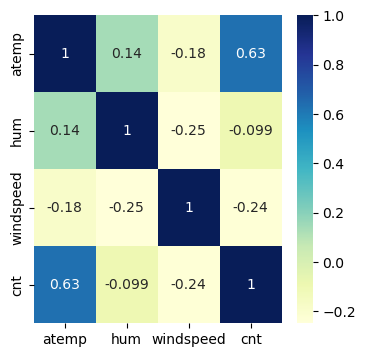

In [407]:
# generate heatmap to see the correlation 
# and see if any more columns can be dropped
plt.figure(figsize=(4,4))
sns.heatmap(df[continous_columns].corr(), annot=True, cmap='YlGnBu')
plt.show()

### <font color='blue'>Observation:</font>
- High correlation with atemp

#### <font color='blue'>1.4.3: EDA: Pairplot between Numerical columns</font>

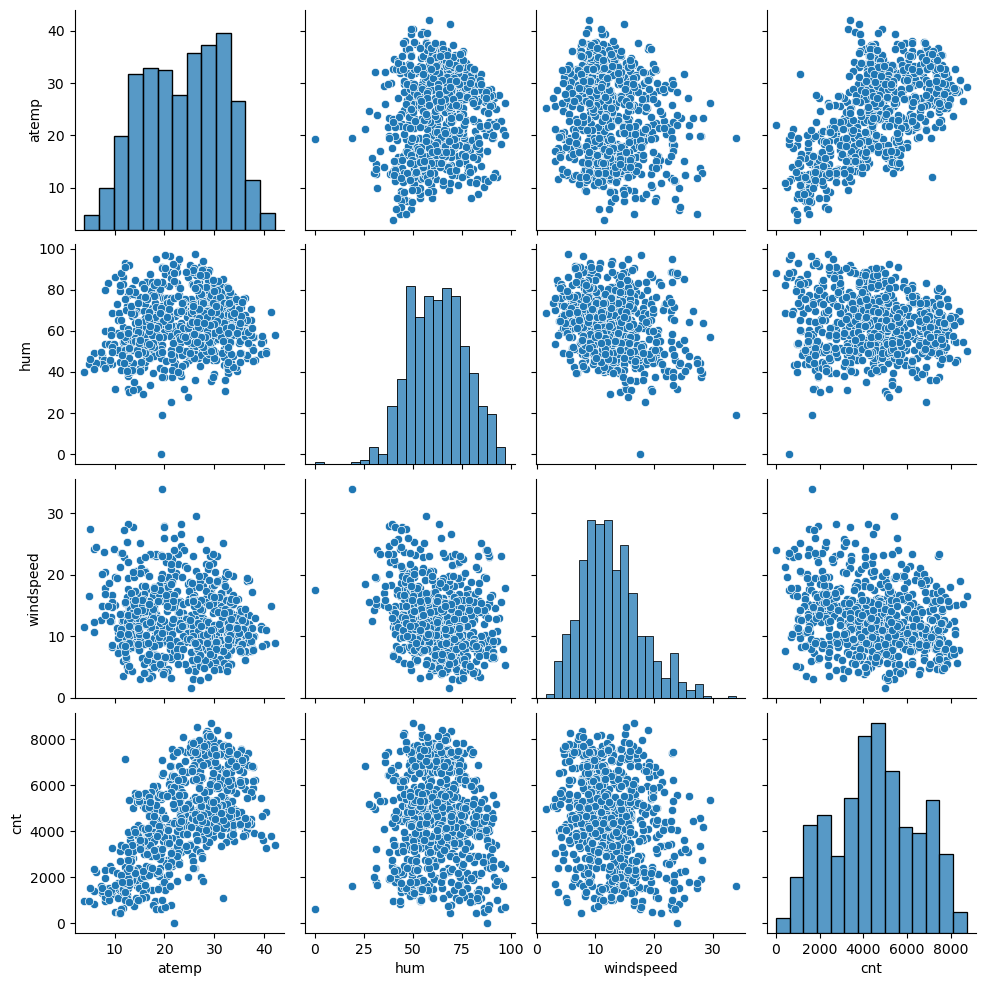

In [408]:
sns.pairplot(df, x_vars=continous_columns, y_vars=continous_columns)
plt.show()

#### <font color='blue'>1.4.4: EDA: Boxplot on Categorical columns</font>

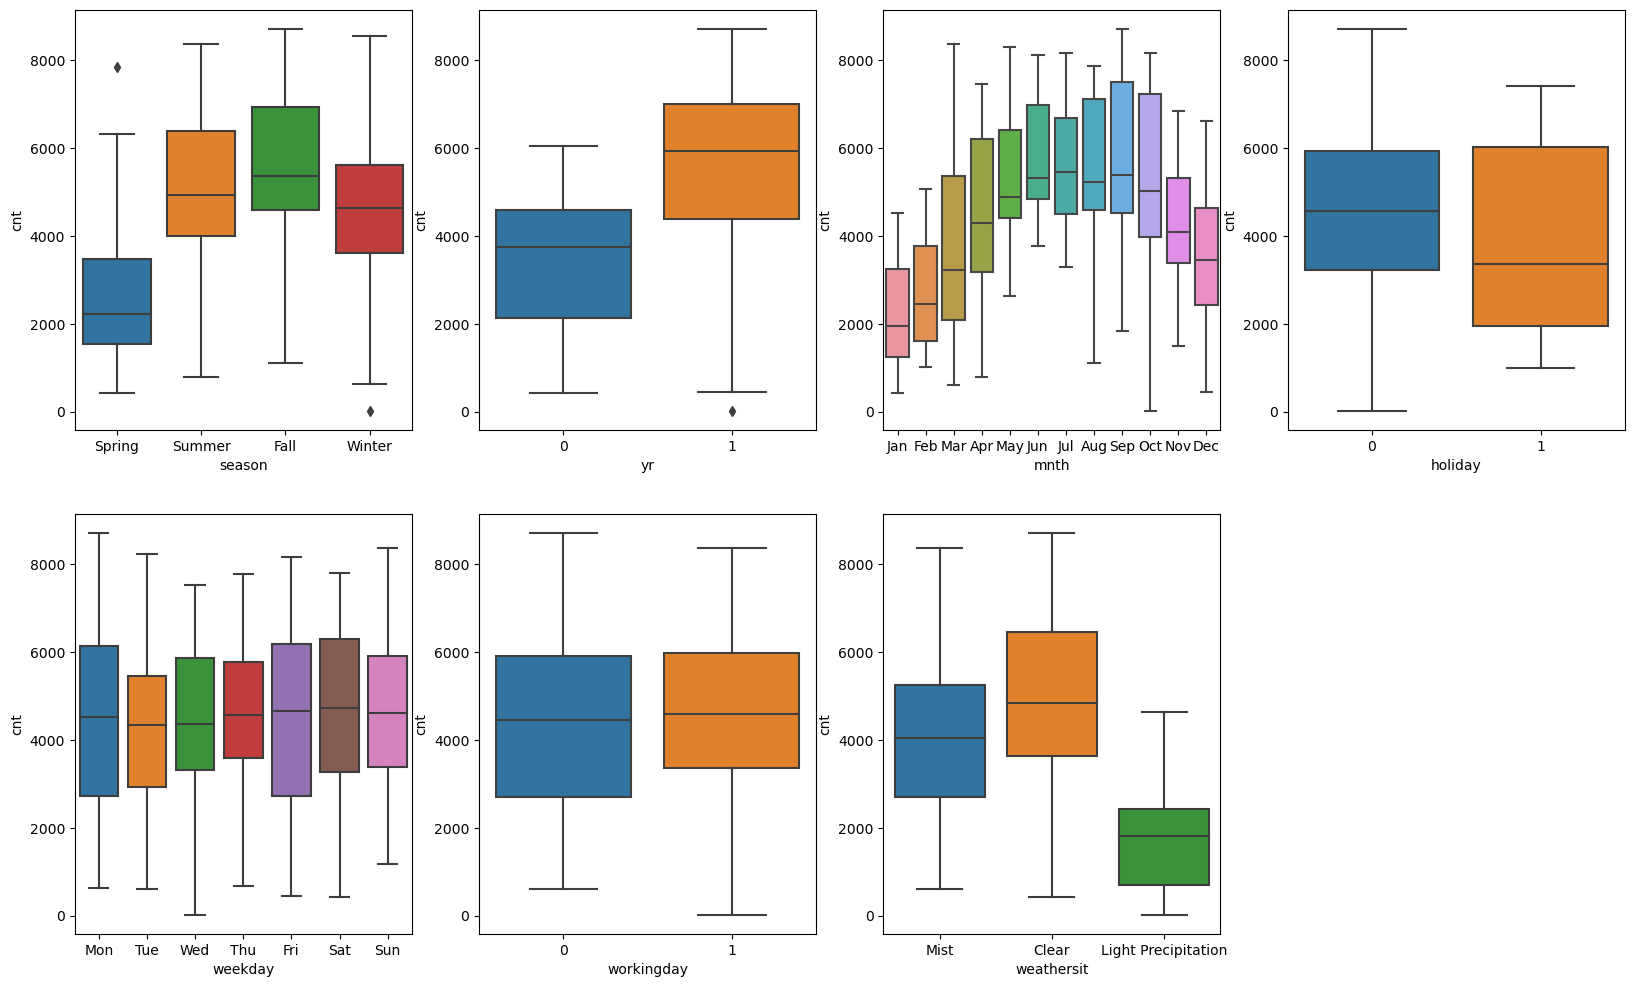

In [409]:
plt.figure(figsize=(20,12))
for i,c in enumerate(categorical_columns):
    plt.subplot(2,4,i+1)
    sns.boxplot(x=c, y='cnt', data=df)

plt.show()

##### <font color='blue'>Obeservation</font>
- season: Highest bike demand is in Fall and lowest is in Spring
- yr: 2019 has seen more demand than 2018
- mnth: Demand has varied much across months, with highest in September, while lowest in January. With an consistent demand from May to October
- holiday: Demand on non-holiday vs holiday
- weekday: No such noticeable difference
- workingday: No such noticeable difference
- weathersit: High demand in Clear weather, with the lowest on Light Precipitation and no demand at all on High Precipitation


#### <font color='blue'>1.4.5: Dropping dummy source columns after EDA</font>

In [410]:
df = df.drop('season', axis=1)
df = df.drop('mnth', axis=1)
df = df.drop('weekday', axis=1)
df = df.drop('weathersit', axis=1)

## <font color='blue'>2. Model building and evaluation</font>

### <font color='blue'>2.1 Train Test Split</font>

In [411]:
# create train-test split with 70:30
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


### <font color='blue'>2.2 Min Max Scaling</font>

In [412]:
# check some values before applying MinMaxScaler
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Precipitation,Mist
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,11.5850,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,0,1,0,0,0,0,0,0,1
111,0,0,1,16.0977,72.9583,14.707907,1683,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [413]:
# scale continous columns
scaler = MinMaxScaler()
df_train[continous_columns] = scaler.fit_transform(df_train[continous_columns])
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Precipitation,Mist
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,1,0,0,0,0,0,0,1
111,0,0,1,0.318819,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,1,0,0,0,0,1


### <font color='blue'>2.3 Dataset Correlation after MinMaxScaling</font>

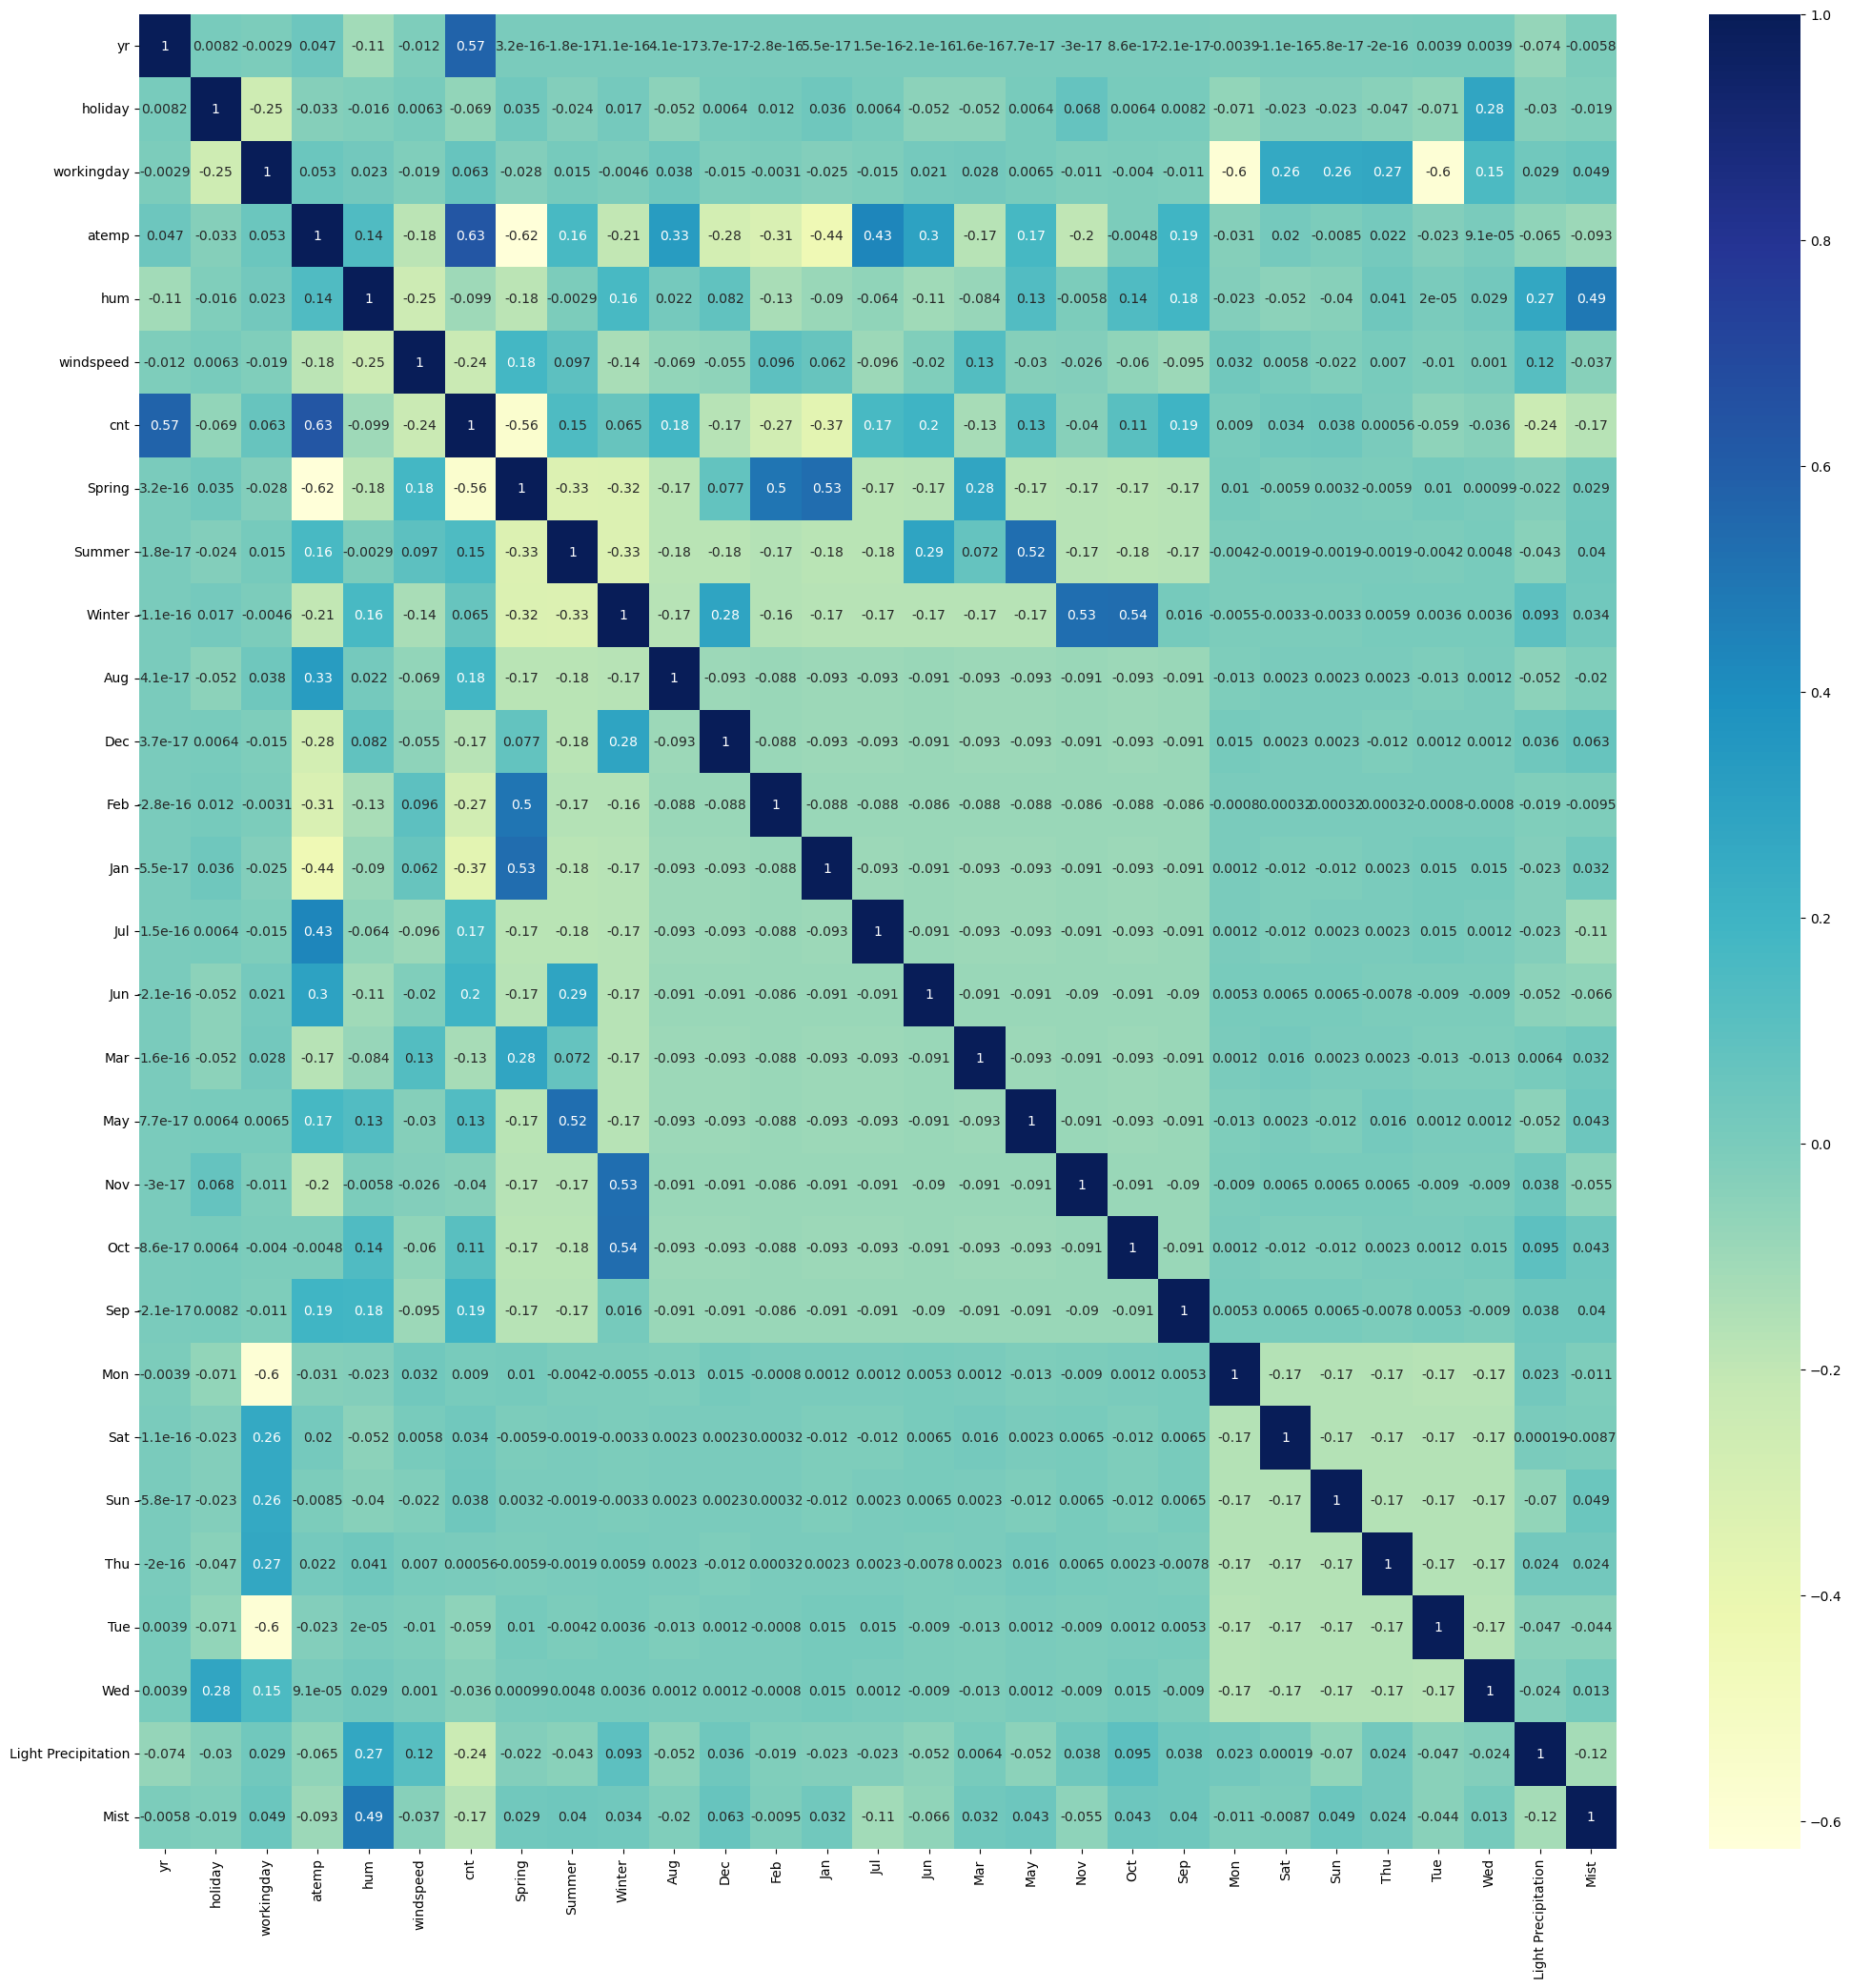

In [414]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

### <font color='blue'>2.4 Linear Regression - Extracting X, y from Training Set </font>

In [415]:
# lets do linear regression using statsmodel
y_train = df_train.pop('cnt')
X_train = df_train

### <font color='blue'>2.5 Building: RFE - Model 1</font>

#### <font color='blue'>2.5.1 Build model and view RFE support & ranking columns</font>

In [416]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(estimator=lr, n_features_to_select=20)
rfe.fit(X_train, y_train)

# list columns and RFE support & ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', True, 1),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', False, 2),
 ('Jun', True, 1),
 ('Mar', False, 9),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', False, 7),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 8),
 ('Sun', False, 6),
 ('Thu', False, 5),
 ('Tue', False, 3),
 ('Wed', False, 4),
 ('Light Precipitation', True, 1),
 ('Mist', True, 1)]

#### <font color='blue'>2.5.2 Collect RFE columns</font>

In [417]:
# collect RFE supported columns
rfe_selected_columns = X_train.columns[rfe.support_]
rfe_dropped_columns = X_train.columns[~rfe.support_]

#### <font color='blue'>2.5.3 Some utility functions to generate Linear Regression with statsmodel and print VIF / Residuals</font>

In [418]:
def lr_by_columns_selection(cols):
    # lets check on few column(s) manually
    X = X_train[cols]
    X_sm = sm.add_constant(X)
    # create linear regression
    lr = sm.OLS(y_train, X_sm)
    # fit model
    lr_model = lr.fit()
    # params
    print(lr_model.params)
    # summary
    print(lr_model.summary())

    # calculate and print VIF
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    print(vif)
    residual_analysis(lr_model, X_sm)
    predict_on_testdata(lr_model)
    return lr_model

def residual_analysis(lr_model, X_sm):
    y_train_pred = lr_model.predict(X_sm)
    res = y_train - y_train_pred
    sns.displot(res, kde=True)
    plt.show()

def predict_on_testdata(lr_model):
    # Predicting on test data
    X_test = df_test.copy()
    X_test[continous_columns] = scaler.fit_transform(X_test[continous_columns])
    y_test = X_test.pop('cnt')

    X_test_sm = X_test
    X_test_sm = sm.add_constant(X_test_sm)
    X_test_sm = X_test_sm.drop(list(rfe_dropped_columns) + lr_dropped_columns, axis=1)
    # predict
    y_test_pred = lr_model.predict(X_test_sm)
    # evaluate
    r2s = r2_score(y_true=y_test, y_pred=y_test_pred)
    print('r2 score: ', r2s)

    res = y_test - y_test_pred
    sns.displot(res, kde=True)
    plt.show()

def negate_list(l1, l2):
    l1 = list(l1)
    l2 = list(l2)
    for i in l2:
        l1.remove(i)
    return l1

### <font color='blue'>2.6 Stats Model - Model 2</font>

#### <font color='blue'>2.6.1 Basing on all columns from RFE - no column drop</font>

const                  0.298734
yr                     0.233813
holiday               -0.041516
workingday             0.044855
atemp                  0.406579
hum                   -0.147020
windspeed             -0.168289
Spring                -0.043441
Summer                 0.040410
Winter                 0.113130
Aug                    0.052809
Dec                   -0.056767
Feb                   -0.043087
Jan                   -0.076842
Jun                    0.030735
May                    0.039981
Nov                   -0.051025
Sep                    0.102953
Mon                    0.053909
Light Precipitation   -0.251617
Mist                  -0.060318
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     137

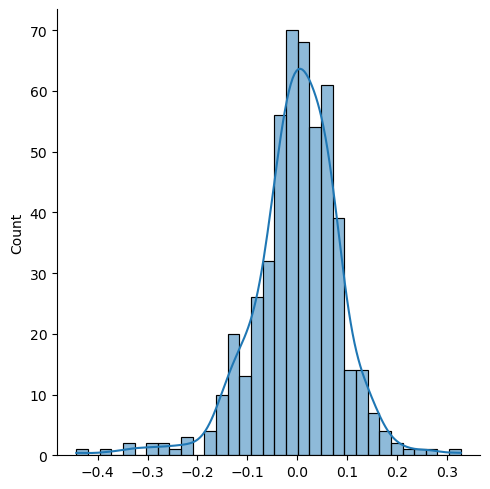

r2 score:  0.8274546100079281


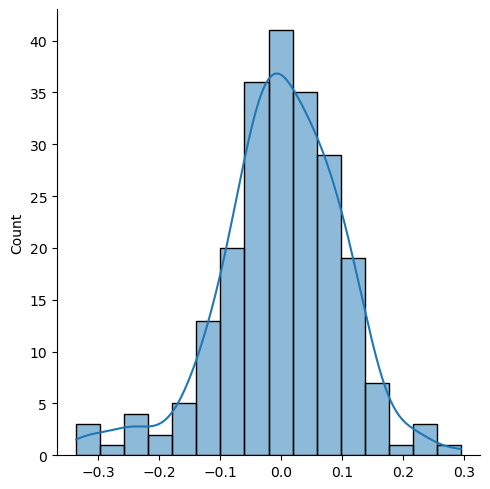

In [419]:
lr_dropped_columns = []
lr_columns = negate_list(list(rfe_selected_columns), lr_dropped_columns)
lrmodel = lr_by_columns_selection(lr_columns)

### <font color='blue'>Observation:</font>
- high p-value (> 0.05): holiday (0.127), Jun (0.87), Spring (0.55)
- high VIF (> 5): hum (33.20), atemp (20.25), Spring (5.93), workingday (5.43)

### <font color='blue'>2.7 Stats Model - Model 3 [Dropping 'hum']</font>

const                  0.231369
yr                     0.237375
holiday               -0.039658
workingday             0.047813
atemp                  0.365904
windspeed             -0.143473
Spring                -0.053227
Summer                 0.032554
Winter                 0.098186
Aug                    0.048341
Dec                   -0.064330
Feb                   -0.045611
Jan                   -0.084407
Jun                    0.036835
May                    0.033612
Nov                   -0.052225
Sep                    0.094457
Mon                    0.058447
Light Precipitation   -0.293397
Mist                  -0.083262
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     140.0
Date:                Wed, 11 

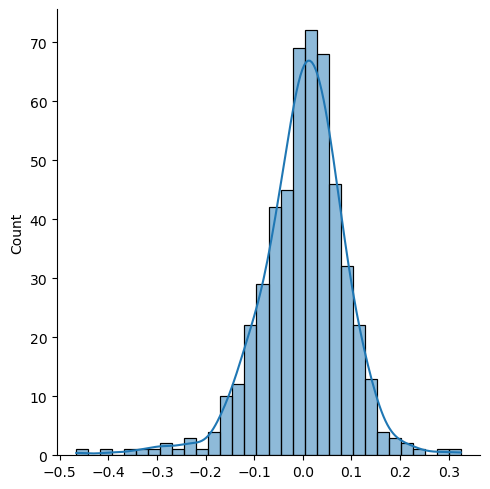

r2 score:  0.8118213886884157


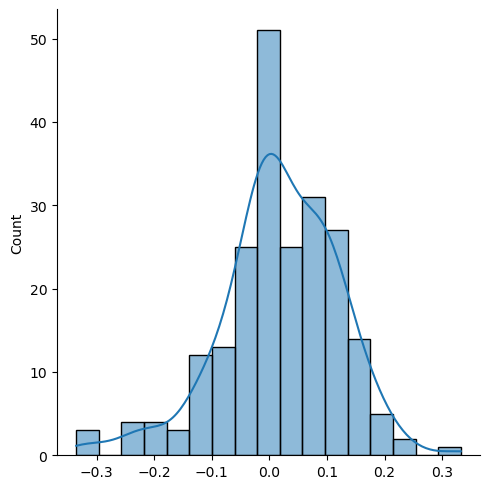

In [420]:
# lets start with dropping hum, as its very high in VIF
lr_dropped_columns = ['hum']
lr_columns = negate_list(list(rfe_selected_columns), lr_dropped_columns)
lrmodel = lr_by_columns_selection(lr_columns)

### <font color='blue'>Observation:</font>
- high p-value (> 0.05): holiday (0.151), May (0.73)
- high VIF (> 5): atemp (8.02), workingday (5.41)

### <font color='blue'>2.8 Stats Model - Model 4 [Dropping 'hum', 'atemp']</font>

const                  0.506598
yr                     0.246601
holiday               -0.031389
workingday             0.048777
windspeed             -0.172271
Spring                -0.167139
Summer                -0.057167
Winter                 0.021236
Aug                    0.049844
Dec                   -0.125050
Feb                   -0.097918
Jan                   -0.164409
Jun                    0.090350
May                    0.083213
Nov                   -0.103750
Sep                    0.082215
Mon                    0.057773
Light Precipitation   -0.308406
Mist                  -0.088115
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     122.6
Date:                Wed, 11 Oct 2023   Prob (F-statistic):  

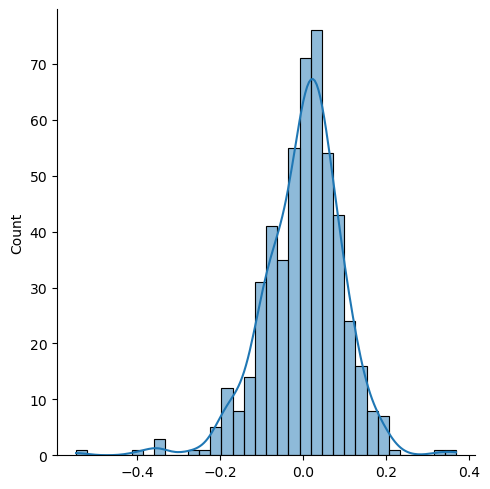

r2 score:  0.7864153675033305


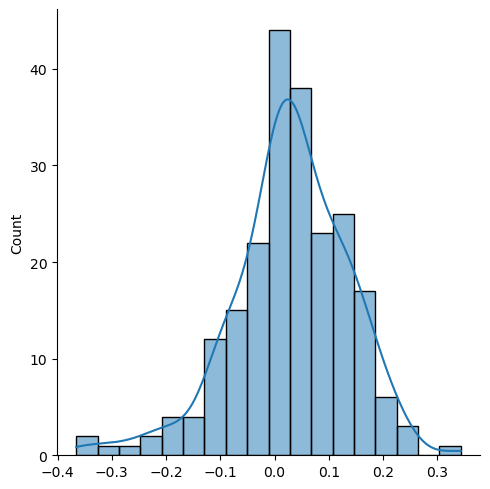

In [421]:
# lets start with dropping hum, as its very high in VIF
lr_dropped_columns = ['hum', 'atemp']
lr_columns = negate_list(list(rfe_selected_columns), lr_dropped_columns)
lrmodel = lr_by_columns_selection(lr_columns)

### <font color='blue'>Observation:</font>
- high p-value (> 0.05): holiday (0.292), Winter (0.228)
- high VIF (> 5): none

### <font color='blue'>2.9 Stats Model - Model 5 [Dropping 'hum', 'atemp', 'holiday']</font>

const                  0.502449
yr                     0.246693
workingday             0.053363
windspeed             -0.172527
Spring                -0.167410
Summer                -0.057514
Winter                 0.021531
Aug                    0.049791
Dec                   -0.125673
Feb                   -0.098891
Jan                   -0.165235
Jun                    0.090812
May                    0.083677
Nov                   -0.106256
Sep                    0.080737
Mon                    0.062383
Light Precipitation   -0.307906
Mist                  -0.087861
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     129.7
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          2.45e-169
Time:         

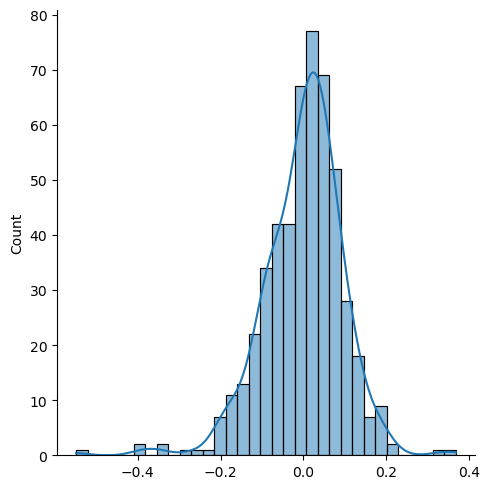

r2 score:  0.7875209611708461


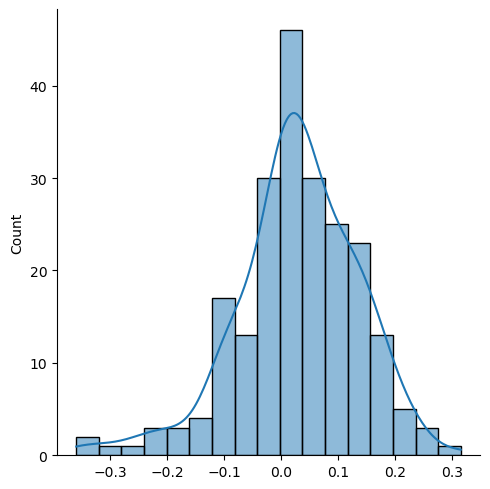

In [422]:
lr_dropped_columns = ['hum', 'atemp', 'holiday']
lr_columns = negate_list(list(rfe_selected_columns), lr_dropped_columns)
lrmodel = lr_by_columns_selection(lr_columns)

### <font color='blue'>Observation:</font>
- high p-value (> 0.05): Winter (0.222)
- high VIF (> 5): none

### <font color='blue'>2.10 Stats Model - Model 6 [Dropping 'hum', 'atemp', 'holiday', 'winter']</font>

const                  0.513288
yr                     0.246720
workingday             0.052962
windspeed             -0.172452
Spring                -0.180741
Summer                -0.067207
Aug                    0.038757
Dec                   -0.117769
Feb                   -0.096661
Jan                   -0.163069
Jun                    0.086169
May                    0.082238
Nov                   -0.095873
Sep                    0.074232
Mon                    0.062468
Light Precipitation   -0.305146
Mist                  -0.086662
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     137.6
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          4.30e-170
Time:                        22:08:46   Log-Li

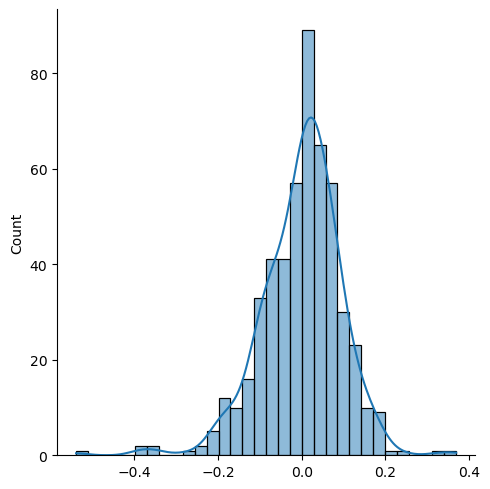

r2 score:  0.7864745023990425


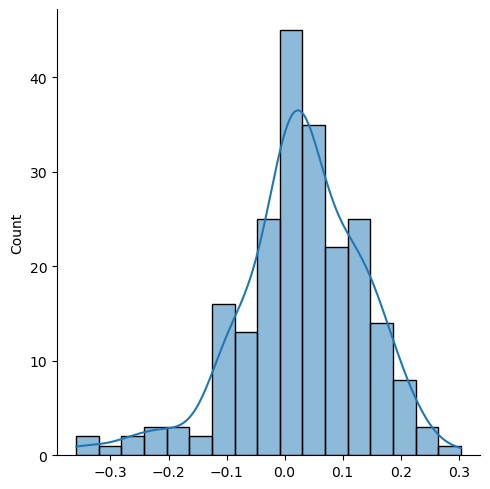

In [423]:
lr_dropped_columns = ['hum','atemp','holiday','Winter']
lr_columns = negate_list(list(rfe_selected_columns), lr_dropped_columns)
lrmodel = lr_by_columns_selection(lr_columns)

### <font color='blue'>Observation:</font>
- high p-value (> 0.05): Aug (0.025 < 0.05)
- high VIF (> 5): none

### <font color='blue'>2.11 Stats Model - Model 7 [Dropping 'hum', 'atemp', 'holiday', 'Winter', 'Aug']</font>

const                  0.525389
yr                     0.247359
workingday             0.054517
windspeed             -0.175003
Spring                -0.190618
Summer                -0.078355
Dec                   -0.127921
Feb                   -0.099442
Jan                   -0.166424
Jun                    0.080144
May                    0.080045
Nov                   -0.108622
Sep                    0.061049
Mon                    0.064138
Light Precipitation   -0.310779
Mist                  -0.085882
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     145.3
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          4.24e-170
Time:                        22:08:47   Log-Likelihood:                 469.46

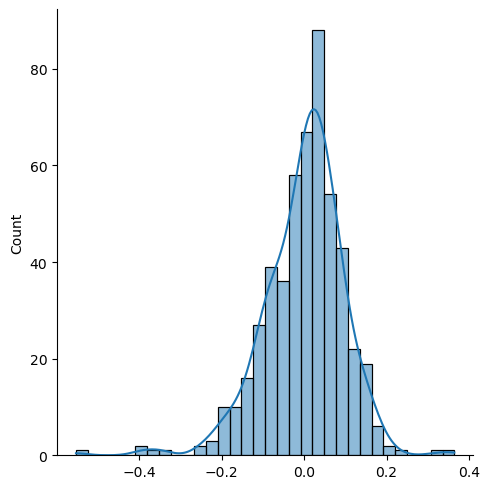

r2 score:  0.7903020326908946


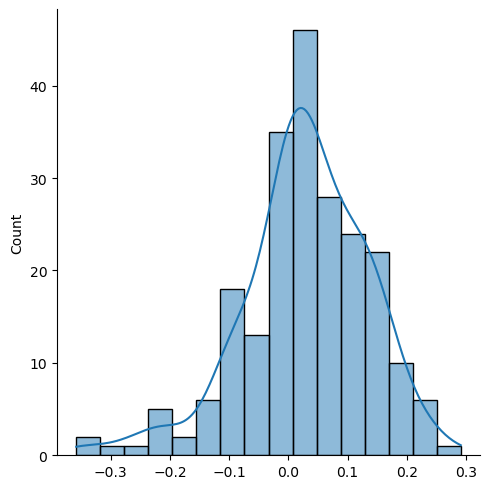

In [424]:
lr_dropped_columns = ['hum', 'atemp', 'holiday', 'Winter', 'Aug']
lr_columns = negate_list(list(rfe_selected_columns), lr_dropped_columns)
lrmodel = lr_by_columns_selection(lr_columns)

### <font color='blue'>Observation:</font>
- high p-value (> 0.05): none
- high VIF (> 5): none

## <font color='blue'>3. Model Evaluation</font>

### <font color='blue'>3.1 Residula Analysis</font>

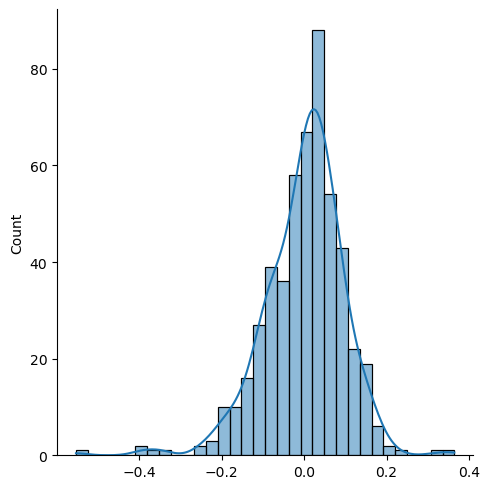

In [425]:
y_train_pred = lr_model.predict(X_sm)
res = y_train - y_train_pred
sns.displot(res, kde=True)
plt.show()

### <font color='blue'>3.2 Regerssion plot on training data - Linearity</font>

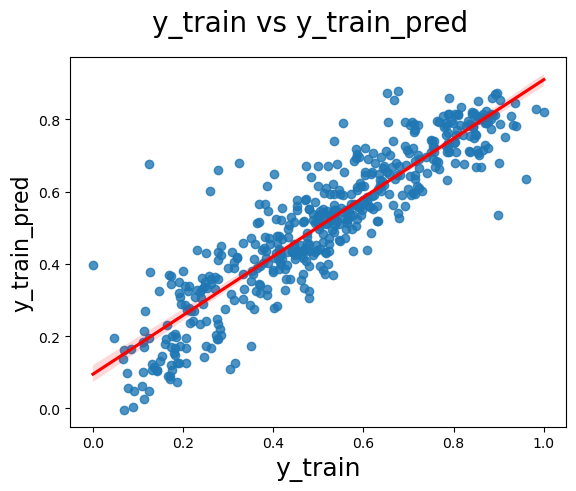

In [426]:
# Regression plot on training data
fig = plt.figure()
sns.regplot(x=y_train,y=y_train_pred,line_kws={"color": "red"})
fig.suptitle('y_train vs y_train_pred', fontsize=20)
plt.xlabel('y_train', fontsize=18)
plt.ylabel('y_train_pred', fontsize=16)
plt.show()

### <font color='blue'>3.3 Regerssion plot on test data - Linearity</font>

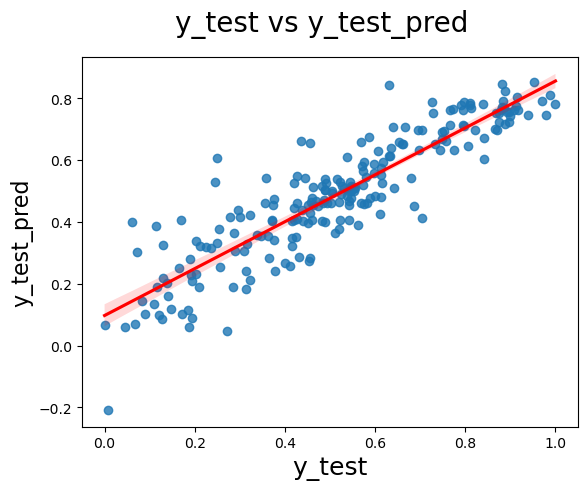

In [427]:
# Regression plot on testing data
fig = plt.figure()
sns.regplot(x=y_test,y=y_test_pred,line_kws={"color": "red"})
fig.suptitle('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)
plt.show()

### <font color='blue'>3.4 Variance Inflation Factor (VIF)</font>

In [428]:
# calculate and print VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

               Features   VIF
2             windspeed  3.96
3                Spring  3.67
1            workingday  3.27
4                Summer  2.62
7                   Jan  2.13
0                    yr  1.87
6                   Feb  1.84
9                   May  1.67
14                 Mist  1.56
12                  Mon  1.55
8                   Jun  1.28
10                  Nov  1.23
5                   Dec  1.21
11                  Sep  1.21
13  Light Precipitation  1.08


## <font color='blue'>4. Final Model - RFE + Stats (manual) Model 8</font>

In [429]:
lr_final_columns = ['yr','workingday','windspeed','Spring','Summer','Dec','Feb','Jan','Jun','May','Nov','Sep','Mon','Light Precipitation','Mist']

X = X_train[lr_final_columns]
X_sm = sm.add_constant(X)
# create linear regression
lr = sm.OLS(y_train, X_sm)
# fit model
lr_model = lr.fit()

In [430]:
# params
print(lr_model.params)

const                  0.525389
yr                     0.247359
workingday             0.054517
windspeed             -0.175003
Spring                -0.190618
Summer                -0.078355
Dec                   -0.127921
Feb                   -0.099442
Jan                   -0.166424
Jun                    0.080144
May                    0.080045
Nov                   -0.108622
Sep                    0.061049
Mon                    0.064138
Light Precipitation   -0.310779
Mist                  -0.085882
dtype: float64


In [431]:
# summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     145.3
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          4.24e-170
Time:                        22:08:49   Log-Likelihood:                 469.46
No. Observations:                 510   AIC:                            -906.9
Df Residuals:                     494   BIC:                            -839.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5254    

In [432]:
# calculate and print VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

               Features   VIF
2             windspeed  3.96
3                Spring  3.67
1            workingday  3.27
4                Summer  2.62
7                   Jan  2.13
0                    yr  1.87
6                   Feb  1.84
9                   May  1.67
14                 Mist  1.56
12                  Mon  1.55
8                   Jun  1.28
10                  Nov  1.23
5                   Dec  1.21
11                  Sep  1.21
13  Light Precipitation  1.08


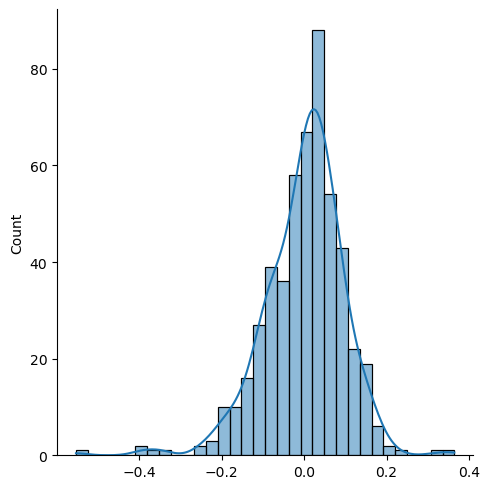

In [433]:
y_train_pred = lr_model.predict(X_sm)
res = y_train - y_train_pred
sns.displot(res, kde=True)
plt.show()

In [434]:
# Predicting on test data
X_test = df_test.copy()
X_test[continous_columns] = scaler.fit_transform(X_test[continous_columns])
y_test = X_test.pop('cnt')

X_test_sm = X_test[lr_final_columns]
X_test_sm = sm.add_constant(X_test_sm)

# predict
y_test_pred = lr_model.predict(X_test_sm)

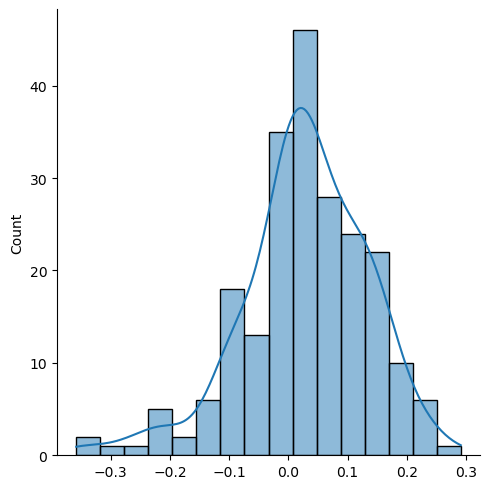

In [435]:
# residula analysis
res = y_test - y_test_pred
sns.displot(res, kde=True)
plt.show()

<font color='blue'><b>The equation from the model is as follows:</b></font>

cnt = 0.2474 * yr + 0.0545 * workingday + -0.1750 * windspeed + -0.1906 * Spring + -0.0784 * Summer + -0.1279 * Dec + -0.0994 * Feb + -0.1664 * Jan + 0.0801 * Jun + 0.0800 * May + -0.1086 * Nov + 0.0610 * Sep + 0.0641 * Mon + -0.3108 * Light Precepitation + -0.0859 * Mist


In [436]:
# evaluate
r2s = r2_score(y_true=y_test, y_pred=y_test_pred)
print('\033[1m', 'r2 score: ', r2s)

 r2 score:  0.7903020326908946
